# **To Predict Weather a Person is Vaccinated or not !!**

 *importing important libraries to work with*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

*Loading Dataset: h1n1_vaccine_prediction*

In [4]:
df = pd.read_csv('h1n1_vaccine_prediction.csv')
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [5]:
df.shape

(26707, 34)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

found that the dataset has a lot of null values in it!


In [7]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

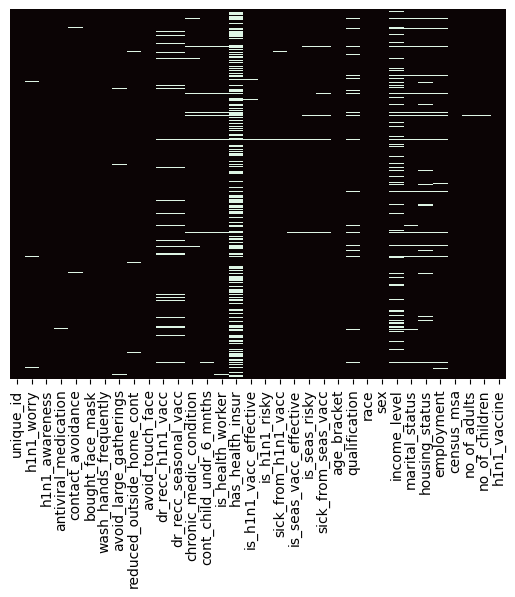

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')
plt.show()

In [9]:
df.describe(include="all")

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [10]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

# **Data Cleaning**

In [11]:
df.drop(["bought_face_mask","wash_hands_frequently","avoid_large_gatherings","reduced_outside_home_cont","unique_id","avoid_touch_face","chronic_medic_condition","qualification","is_health_worker","cont_child_undr_6_mnths","income_level","housing_status","employment","census_msa","race","marital_status"],axis=1,inplace=True)

In [12]:
df.sample(10)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,sex,no_of_adults,no_of_children,h1n1_vaccine
17343,2.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,5.0,4.0,4.0,45 - 54 Years,Female,1.0,0.0,0
24306,2.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,4.0,4.0,5.0,4.0,4.0,55 - 64 Years,Male,1.0,0.0,1
23635,3.0,1.0,0.0,1.0,0.0,0.0,NaN,3.0,4.0,4.0,4.0,5.0,5.0,18 - 34 Years,Female,1.0,0.0,0
14088,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,1.0,2.0,2.0,1.0,1.0,65+ Years,Male,1.0,0.0,0
7620,0.0,1.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,5.0,5.0,1.0,5.0,35 - 44 Years,Female,1.0,1.0,0
2392,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,45 - 54 Years,Female,1.0,0.0,0
14672,2.0,2.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,1.0,18 - 34 Years,Female,2.0,2.0,0
23541,1.0,1.0,0.0,1.0,0.0,0.0,NaN,4.0,2.0,2.0,4.0,2.0,1.0,35 - 44 Years,Female,0.0,2.0,0
12734,3.0,2.0,0.0,1.0,1.0,1.0,1.0,4.0,5.0,1.0,4.0,5.0,1.0,55 - 64 Years,Female,1.0,0.0,1
23554,0.0,2.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,1.0,4.0,1.0,4.0,18 - 34 Years,Male,2.0,0.0,0


In [13]:
df=pd.get_dummies(columns = ["sex","age_bracket"],data=df)

In [14]:
df.sample()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,...,no_of_adults,no_of_children,h1n1_vaccine,sex_Female,sex_Male,age_bracket_18 - 34 Years,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years
26589,2.0,2.0,0.0,1.0,1.0,1.0,1.0,4.0,2.0,2.0,...,1.0,3.0,0,False,True,False,False,True,False,False


In [15]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
no_of_adults                 float64
no_of_children               float64
h1n1_vaccine                   int64
sex_Female                      bool
sex_Male                        bool
age_bracket_18 - 34 Years       bool
age_bracket_35 - 44 Years       bool
age_bracket_45 - 54 Years       bool
age_bracket_55 - 64 Years       bool
age_bracket_65+ Years           bool
dtype: object

In [16]:
columns_mean = df[['dr_recc_h1n1_vacc','no_of_children','no_of_adults','is_seas_risky','is_seas_vacc_effective','dr_recc_seasonal_vacc','has_health_insur','sick_from_seas_vacc','h1n1_vaccine','antiviral_medication','h1n1_worry','h1n1_awareness','contact_avoidance','is_h1n1_vacc_effective','is_h1n1_risky']].mean()
df[['dr_recc_h1n1_vacc','no_of_children','no_of_adults','is_seas_risky','is_seas_vacc_effective','dr_recc_seasonal_vacc','has_health_insur','sick_from_seas_vacc','h1n1_vaccine','antiviral_medication','h1n1_worry','h1n1_awareness','contact_avoidance','is_h1n1_vacc_effective','is_h1n1_risky']] = df[['dr_recc_h1n1_vacc','no_of_children','no_of_adults','is_seas_risky','is_seas_vacc_effective','dr_recc_seasonal_vacc','has_health_insur','sick_from_seas_vacc','h1n1_vaccine','antiviral_medication','h1n1_worry','h1n1_awareness','contact_avoidance','is_h1n1_vacc_effective','is_h1n1_risky']].fillna(columns_mean)

In [17]:
df.isnull().sum()

h1n1_worry                     0
h1n1_awareness                 0
antiviral_medication           0
contact_avoidance              0
dr_recc_h1n1_vacc              0
dr_recc_seasonal_vacc          0
has_health_insur               0
is_h1n1_vacc_effective         0
is_h1n1_risky                  0
sick_from_h1n1_vacc          395
is_seas_vacc_effective         0
is_seas_risky                  0
sick_from_seas_vacc            0
no_of_adults                   0
no_of_children                 0
h1n1_vaccine                   0
sex_Female                     0
sex_Male                       0
age_bracket_18 - 34 Years      0
age_bracket_35 - 44 Years      0
age_bracket_45 - 54 Years      0
age_bracket_55 - 64 Years      0
age_bracket_65+ Years          0
dtype: int64

In [18]:
mean1 = df["sick_from_h1n1_vacc"].mean()
df["sick_from_h1n1_vacc"] = df["sick_from_h1n1_vacc"].replace(np.nan,mean1)

In [19]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
sex_Female                   0
sex_Male                     0
age_bracket_18 - 34 Years    0
age_bracket_35 - 44 Years    0
age_bracket_45 - 54 Years    0
age_bracket_55 - 64 Years    0
age_bracket_65+ Years        0
dtype: int64

# Logical Regression

In [20]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['h1n1_vaccine'],axis=1)
y = df['h1n1_vaccine']
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model_1 = LogisticRegression()

In [23]:
model_1.fit(X_train,y_train)

c:\Users\jaite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
model_1.score(X_train,y_train)

0.8307980341680318

In [25]:
model_1.score(X_test,y_test)

0.8290902283788844

In [26]:
Prediction = model_1.predict(X_test)

In [27]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

## Model Refinement and Evaluation
We will focus on classification models as our task is to predict whether a person is vaccinated or not, which is a binary classification problem. We will use Logistic Regression and explore other classification models such as Random Forest Classifier and Gradient Boosting Classifier. Additionally, we will add evaluation metrics like precision, recall, F1-score, and confusion matrix for a comprehensive evaluation.

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [29]:
model_3 = GradientBoostingClassifier()
model_3.fit(X_train, y_train)
print('Training Accuracy:', model_3.score(X_train, y_train))
print('Test Accuracy:', model_3.score(X_test, y_test))
predictions_3 = model_3.predict(X_test)
print(classification_report(y_test, predictions_3))
print(confusion_matrix(y_test, predictions_3))

Training Accuracy: 0.8535923238942195
Test Accuracy: 0.8509921377761138
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4178
           1       0.76      0.47      0.58      1164

    accuracy                           0.85      5342
   macro avg       0.81      0.71      0.74      5342
weighted avg       0.84      0.85      0.84      5342

[[4003  175]
 [ 621  543]]


In [30]:
model_5 = RandomForestClassifier()
model_5.fit(X_train, y_train)
print('Training Accuracy:', model_5.score(X_train, y_train))
print('Test Accuracy:', model_5.score(X_test, y_test))
predictions_5 = model_5.predict(X_test)
print(classification_report(y_test, predictions_5))
print(confusion_matrix(y_test, predictions_5))

Training Accuracy: 0.9961151415867072
Test Accuracy: 0.8375140396855111
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4178
           1       0.71      0.43      0.54      1164

    accuracy                           0.84      5342
   macro avg       0.78      0.69      0.72      5342
weighted avg       0.82      0.84      0.82      5342

[[3968  210]
 [ 658  506]]
